In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns

from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

mpl.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [281]:
hom_amp_df = pd.read_excel('GluR2_KA_summary211118.xlsx', sheetname='KA 1mM Homomers summary')
hom_amp_df.loc[(hom_amp_df['Mutant'] =='PQK528-530Del'), 'Mutant'] = 'P528-530Del'

het_amp_df = pd.read_excel('GluR2_KA_summary211118.xlsx', sheetname='KA 1mM Heteromers Summary')

het_ramps_df = pd.read_excel('C:\\Users\\cdixon\\Documents\\DataSynaptopathies\\2018\\Glu\\ramps_results_Mar18_fullHet.xlsx')
het_ramps_df.loc[(het_ramps_df['Mutant'] =='528Del'), 'Mutant'] = 'P528-530Del'

hom_ramps_df = pd.read_excel('C:\\Users\\cdixon\\Documents\\DataSynaptopathies\\2018\\Glu\\ramps_results_Hom_full.xlsx')


In [282]:
for f in [hom_amp_df, hom_ramps_df, het_amp_df, het_ramps_df]:
    print('rows: ',len(f))
    print(f.Mutant.value_counts())

rows:  195
WT             25
G745V          18
I375V          14
G609R          13
P528-530Del    11
G778A          10
T646N          10
A643T          10
A639S          10
Q607E          10
V647L          10
V830M           9
W788L           8
D611N           8
G47E            7
P528T           7
F644L           6
D302G           6
GRIA1           1
Name: Mutant, dtype: int64
rows:  17
Q607E    7
WT       6
D611N    4
Name: Mutant, dtype: int64
rows:  200
WT        28
GRIA1     21
A639S     19
D611N     15
528Del    15
F644L     14
Q607E     12
T646N     12
I375V     11
G609R     11
D302G     10
W788L     10
P528T      9
G47E       7
V647L      6
Name: Mutant, dtype: int64
rows:  167
GRIA1          19
WT             19
A639S          18
P528-530Del    14
D611N          13
G609R          11
F644L          10
Q607E          10
T646N          10
P528T           9
I375V           9
D302G           7
W788L           7
G47E            6
V647L           5
Name: Mutant, dtype: int64


# Export files (wide data for stats in Prism)

In [ ]:
# Exporting data for amplitude and hold: Heteromer experiment

File = pd.ExcelWriter('GluR1_prism181121.xlsx')

Amp = gluR1_df[['Mutant','KA Amplitude']]
Amp = Amp.pivot(columns='Mutant', values='KA Amplitude')
AmpG1_prism = Amp.apply(lambda x: pd.Series(x.dropna().values))

AmpG1_prism.to_excel(File, sheet_name='G1_Amp', index=False)

Hold = gluR1_df[['Mutant', 'KA Holding current']]
Hold = Hold.pivot(columns='Mutant', values='KA Holding current')
HoldG1_prism = Hold.apply(lambda x: pd.Series(x.dropna().values))

HoldG1_prism.to_excel(File, sheet_name='G1_Hold', index=False)

File.save()

In [ ]:
# Exporting data for amplitude and hold: Homomer experiment

# Change this to reflect today's date <---

File = pd.ExcelWriter('GluR2_prism181121.xlsx')
paper_mutants_G2 = ['WT', 'G609R', 'A639S', 'T646N']

Amp = df[['Mutant','KA Amplitude']]
Amp = Amp.pivot(columns='Mutant', values='KA Amplitude')
AmpG2_prism = Amp.apply(lambda x: pd.Series(x.dropna().values))

AmpG2_prism.to_excel(File, sheet_name='G2_Amp_Supp', index=False)

AmpG2_prism_paper = AmpG2_prism[paper_mutants_G2]
AmpG2_prism_paper.to_excel(File, sheet_name='G2_Amp_paper', index=False)


Hold = df[['Mutant', 'KA Holding current']]
Hold = Hold.pivot(columns='Mutant', values='KA Holding current')
HoldG2_prism = Hold.apply(lambda x: pd.Series(x.dropna().values))

HoldG2_prism.to_excel(File, sheet_name='G2_Hold_Supp', index=False)

HoldG2_prism_paper = HoldG2_prism[paper_mutants_G2]
HoldG2_prism_paper.to_excel(File, sheet_name='G2_Hold_paper', index=False)

File.save()

# Identify the mutants to include in graphs

In [283]:
hom_amp_df['Mutant'].unique()

array(['A639S', 'WT', 'W788L', 'F644L', 'G609R', 'V647L', 'G745V', 'V830M',
       'G778A', 'P528-530Del', 'I375V', 'P528T', 'A643T', 'T646N', 'G47E',
       'D302G', 'Q607E', 'D611N', nan, 'GRIA1'], dtype=object)

In [284]:
het_amp_df['Mutant'].unique()

array(['WT', 'GRIA1', 'W788L', 'A639S', 'T646N', 'G609R', 'I375V', 'F644L',
       'P528T', 'V647L', '528Del', 'G47E', 'D302G', 'Q607E', 'D611N'], dtype=object)

In [285]:
# fix the het mutant labels

het_amp_df.loc[het_amp_df['Mutant'] == '528Del', 'Mutant'] = 'P528-530Del'

In [286]:
# het mutants includes neg and positive control
het_mutants = ['WT', 'GRIA1', 'G47E', 'D302G', 'I375V', 'P528T', 'P528-530Del', 'Q607E', 'G609R', 'D611N', 
                 'A639S', 'F644L', 'T646N', 'V647L',]

#dump the mutants that aren't in the list of useful ones
hom_amp_df = hom_amp_df[hom_amp_df['Mutant'].isin(homomer_mutants)]
#Change the labels to be consistent


# We can change this if we decide to rename some columns
# Should probably organise this at the data import stage
het_labels = ['WT', '—', 'G47E', 'D302G','I375V', 'P528T', 'P528-530Del', 'Q607E', 'G609R', 'D611N', 
                 'A639S', 'F644L', 'T646N', 'V647L']

# Addition of Lurcher; no neg control
homomer_mutants = ['WT', 'G47E', 'D302G', 'I375V', 'P528T', 'P528-530Del', 'Q607E', 'G609R', 'D611N', 
                 'A639S', 'A643T', 'F644L', 'T646N', 'V647L',]

all_mutants = ['WT', 'GRIA1', 'G47E', 'D302G', 'I375V', 'P528T', 'P528-530Del', 'Q607E', 'G609R', 'D611N', 
                 'A639S', 'A643T', 'F644L', 'T646N', 'V647L',]

15


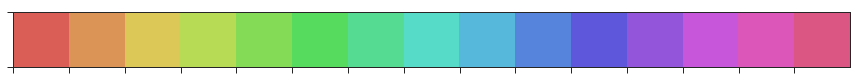

In [287]:
# Assign a consistent colorscheme:
rgb15 = sns.color_palette('hls', n_colors=15)
print(len(rgb15))
sns.palplot(rgb15)

#'Paired' is also good but only 12

In [288]:

color_dict = dict(zip(all_mutants, rgb15))

In [290]:
# use list comprehensions to generate the color list for the het and hom graphs

color_dict

{'A639S': (0.37119999999999997, 0.33999999999999997, 0.85999999999999999),
 'A643T': (0.57919999999999994, 0.33999999999999997, 0.85999999999999999),
 'D302G': (0.72479999999999989, 0.85999999999999999, 0.33999999999999997),
 'D611N': (0.33999999999999997, 0.51679999999999993, 0.85999999999999999),
 'F644L': (0.7871999999999999, 0.33999999999999997, 0.85999999999999999),
 'G47E': (0.85999999999999999, 0.78720000000000001, 0.33999999999999997),
 'G609R': (0.33999999999999997, 0.72479999999999989, 0.85999999999999999),
 'GRIA1': (0.85999999999999999, 0.57919999999999994, 0.33999999999999997),
 'I375V': (0.51679999999999993, 0.85999999999999999, 0.33999999999999997),
 'P528-530Del': (0.33999999999999997,
  0.85999999999999999,
  0.57920000000000016),
 'P528T': (0.33999999999999997, 0.85999999999999999, 0.37119999999999997),
 'Q607E': (0.33999999999999997, 0.85999999999999999, 0.78720000000000012),
 'T646N': (0.85999999999999999, 0.33999999999999997, 0.72479999999999956),
 'V647L': (0.8599

# Plot homomer data

In [291]:
hom_amp_df.columns

Index(['Date', 'Mutant', 'Record', 'KA Holding current', 'KA Amplitude',
       'CTZ Holding current', 'CTZ Amplitude', 'Glu Holding current',
       'Glu Amplitude', 'KA Holding current.1', 'KA Amplitude.1'],
      dtype='object')

In [292]:
# make the errorbar dictionary

hom_sem_df = hom_amp_df.groupby('Mutant')['KA Amplitude'].sem()/1000

# make a list of errors in the order of the final plot
hom_sem_list = []
for m in homomer_mutants:
    hom_sem_list.append(hom_sem_df[m])
    
    
het_sem_df = het_amp_df.groupby('Mutant')['KA Amplitude'].sem()/1000

het_sem_list = []
for m in het_mutants:
    het_sem_list.append(het_sem_df[m])

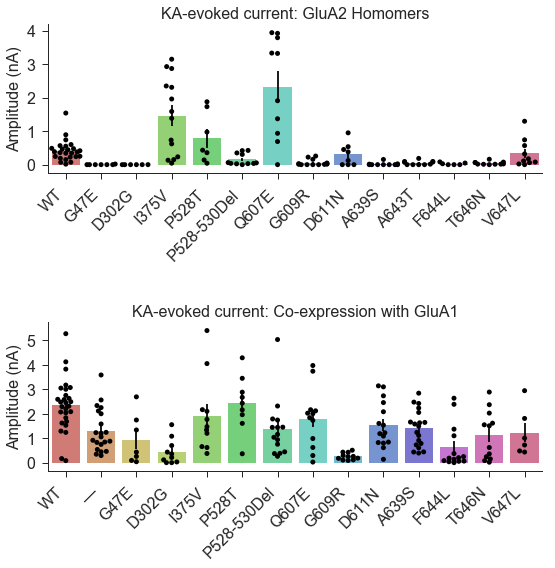

In [296]:

def swarmplot_format(ylabel='Amplitude (nA)', fontsize=16, xlabels=het_labels):
    sns.set_style("ticks", {"axes.linewidth": 1})
    plt.xticks(range(len(xlabels)), xlabels, rotation=45, size=fontsize, ha='right')
    plt.xlabel('')
    plt.yticks(size=fontsize)
    plt.ylabel(ylabel, size=fontsize)
    sns.despine()
    plt.tight_layout()
    pass


# Make a plot of hom and het amplitude

fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(211)

sns.barplot(x=hom_amp_df['Mutant'], y=hom_amp_df['KA Amplitude']/1000, ci=None,
              order=homomer_mutants, alpha=0.9, palette=color_dict, yerr=hom_sem_list)

sns.swarmplot(x=hom_amp_df['Mutant'], y=hom_amp_df['KA Amplitude']/1000, 
              color='k', order=homomer_mutants)
swarmplot_format(fontsize=16, xlabels=homomer_mutants, ylabel='Amplitude (nA)')
plt.title('KA-evoked current: GluA2 Homomers', fontsize=16)


ax2 = plt.subplot(212)
sns.barplot(x=het_amp_df['Mutant'], y=het_amp_df['KA Amplitude']/1000, ci=None,
              order=het_mutants, alpha=0.9, palette=color_dict, yerr=het_sem_list)
sns.swarmplot(x=het_amp_df['Mutant'], y=het_amp_df['KA Amplitude']/1000, 
              color='k', order=het_mutants)
swarmplot_format(ylabel='Amplitude (nA)', fontsize=16, xlabels=het_labels)
plt.title('KA-evoked current: Co-expression with GluA1', fontsize=16)

plt.subplots_adjust(hspace=1)


plt.savefig('Amplitude_resub_March_Color.pdf', transparent=True)
plt.show()


# Heteromer expression data: GluR1 and GluR2

In [ ]:
# Use sns.axes_style() to output style parameters


#Annotation:

y = (gluR1_df['KA Amplitude'][gluR1_df['Mutant']=='GRIA1'].max()/1000)
h = y*1.3

signif = ['', '**', '****', '**', '**']

def sig_stars(h, star_list, color='black', size=24):
    for x in range(0, len(star_list)):
        plt.text(x, h, star_list[x], ha='center', va='bottom', color=color, size=size)
        pass



plt.figure(figsize=(12,6))
fig = sns.swarmplot(x=gluR1_df['Mutant'], y=(gluR1_df['KA Amplitude']/1000), order=resub_mutants, 
                    color='black')


#fig.map(plt.hist,'Outstate',bins=20,alpha=0.7)



#sig_stars(h, signif, color='red', size=20)

#fig = sns.boxplot(x=gluR1_df['Mutant'], y=(gluR1_df['KA Amplitude']/1000), order=resub_mutants, 
                  #saturation=1, width=0.4, boxprops=dict(alpha=.3), showfliers=False)
    
sns.barplot(x=gluR1_df['Mutant'], y=(gluR1_df['KA Amplitude']/1000), order=resub_mutants, 
                  saturation=1, )  
swarmplot_format()


#plt.savefig('181121_KA_amp_hetero_black_small.pdf')


# Calculate t-test p-values
WT_gluR1_df = gluR1_df[gluR1_df['Mutant'] == 'WT']

# the number unpacks the p-value from the returned tuple
rawP_gluR1 = gluR1_df.groupby('Mutant')['KA Amplitude'].apply(lambda x: stats.ttest_ind(x, WT_gluR1_df['KA Amplitude'], 
                                                                              equal_var=False)[1])

print(rawP_gluR1)

In [ ]:
# Figure out how to add p-values to the graph
# turn p value chart into dict and lookup with star function

def assign_stars(p):
    if p > 0.05:
        return 'ns'
    elif p > 0.01:
        return '*'
    elif p > 0.001:
        return '**'
    else:
        return '***'

#rawP_gluR1.to_dict()

GluR1_res = pd.DataFrame(rawP_gluR1)
GluR1_res.columns = ['rawP']
GluR1_res['raw_sig'] = GluR1_res.rawP.apply(lambda x: assign_stars(x))
GluR1_res['bonferroni_p'] = multipletests(rawP_gluR1, method='bonferroni')[1]
GluR1_res['adj_sig'] = GluR1_res.bonferroni_p.apply(lambda x: assign_stars(x))
GluR1_res

In [ ]:
ramps_df.head(10)


In [ ]:

#ramps_df = ramps_df[ramps_df.Mutant.isin(resub_mutants)]
#ramps_df_baby = ramps_df[ramps_df.Mutant != 'V647L']
stats.kurtosis(ramps_df['RI'])

In [ ]:
ramps_df.groupby('Mutant')['RI'].count()

In [ ]:
WT_ramps = ramps_df[ramps_df['Mutant'] == 'WT']

# the number unpacks the p-value from the returned tuple
rawP = ramps_df.groupby('Mutant')['RI'].apply(lambda x: stats.ttest_ind(x, WT_ramps['RI'], equal_var=False)[1])

In [ ]:
rawP

In [ ]:
print(rawP < 0.05)



In [ ]:

p_adjusted = multipletests(rawP, method='bonferroni')

In [ ]:
p_adjusted

In [ ]:
# ramps RI data

plt.figure(figsize=(12,6))
fig = sns.swarmplot(x=ramps_df['Mutant'], y=(ramps_df['RI']*-1), order=resub_mutants, 
                    color='black')
sns.barplot(x=ramps_df['Mutant'], y=(ramps_df['RI']*-1), order=resub_mutants, 
                  saturation=1, )  
swarmplot_format(ylabel='RI')


In [ ]:
# For supplementary: 
# Check this: do the labels line up properly?

sns.swarmplot(x=gluR1_df['Mutant'], y=(gluR1_df['KA Holding current']/1000), color='k')
swarmplot_format(ylabel='Holding current (nA)', fontsize=16, )
#plt.savefig('Heteromer_holding_supp3_bw.pdf', transparent=True)

# Plot the RI against the amplitude

In [ ]:
ramps_df.head(1)

In [ ]:
# make a colourscheme for the scatterplot

control_wt = 'black'
control_pos = 'grey'
gate = 'green'
linker = 'purple'
Nterm = 'blue'
Select = 'red'


scatter_cmap = {'WT':control_wt, 'GRIA1':control_pos, 'G47E':Nterm, 'D302G':Nterm,'I375V':control, 'P528T':linker, 
                '528Del':linker, 'Q607E':Select, 'G609R':Select, 'D611N':Select, 
                 'A639S':gate, 'F644L':gate, 'T646N':gate, 'V647L':gate}

# Don't use this: use color_dict

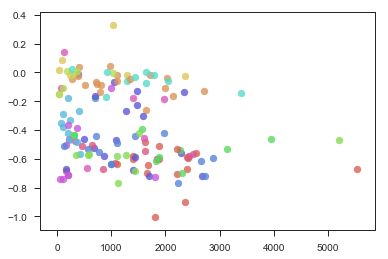

In [256]:
for row in range(len(het_ramps_df)):
    data = het_ramps_df.iloc[row]
    x = data['-70mV I']*-1
    y = data['RI']
    m = data['Mutant']

    if m in color_dict.keys():
        c = color_dict[m]
        plt.scatter(x,y,color=c,alpha=0.8)

    

plt.show()

In [260]:
ramps_paper = het_ramps_df[het_ramps_df['Mutant'] != 'W788L']
DK_scatter = ramps_paper.groupby('Mutant')[['-70mV I','RI']].mean()
DK_scatter.head(3)

,-70mV I,RI
Mutant,,
A639S,-1283.597463,-0.403514
D302G,-295.668858,-0.058419
D611N,-1475.631682,-0.564678


In [261]:
# Need to add in the statistics here. Maybe 528T has a sig reduced RI?

DK_error = ramps_paper.groupby('Mutant')[['-70mV I','RI']].sem()

In [262]:
DK_error.columns

Index(['-70mV I', 'RI'], dtype='object')

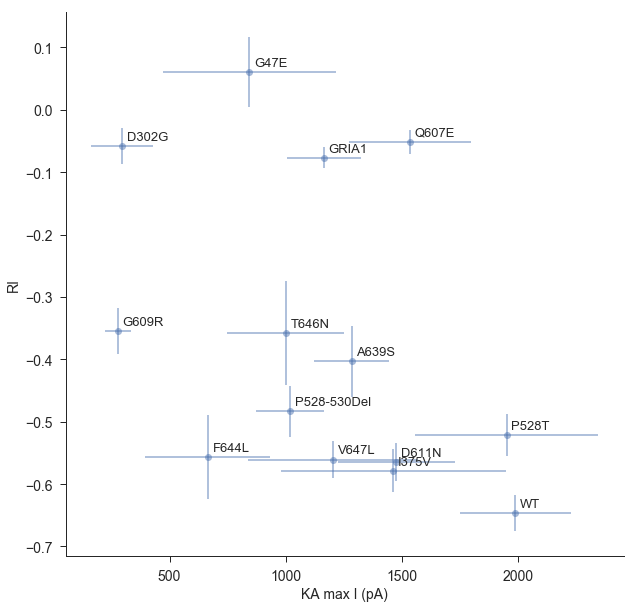

In [263]:


fig = plt.figure(figsize=(10,10
                         ))

#plt.scatter(x=DK_scatter['-70mV I']*-1, y=DK_scatter['RI'])
plt.xlabel('KA max I (pA)', fontsize=14)
plt.ylabel('RI', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.errorbar(x=DK_scatter['-70mV I']*-1, y=DK_scatter['RI'], xerr=DK_error['-70mV I'], 
             yerr=DK_error['RI'], fmt='o', alpha=1, )

#add tags
for row in range(len(DK_scatter)):
    label = DK_scatter.index[row]
    x = DK_scatter['-70mV I'][row]
    y = DK_scatter['RI'][row]
    plt.text((x*-1)+20,y+0.01,label, fontsize=13)
   
    
sns.despine()
plt.savefig('MaxI_vsRI_resub_draft.pdf')
plt.show()

In [ ]:

    
mutant_order = ['WT', 'G609R', 'A639S', 'T646N']
paper_mutants = ['WT', 'GRIA1', 'G609R', 'A639S', 'T646N']

df_plot = df[df['Mutant'].isin(paper_mutants)]

poster_pal_UCL = {'WT':'#0097a9', 'GRIA1':'#d50032', 'G609R':'#f6be00', 'A639S':'#8f993e', 'T646N':'#500778'} #only used for poster

plt.figure(figsize=(3.5,4))
fig = sns.swarmplot(x=df_plot['Mutant'], y=(df_plot['KA Amplitude']/1000), order=mutant_order, color='black')
swarmplot_format(xlabels=('WT', 'G609R', 'A639S', 'T646N'))


#Annotation:

y = (df_plot['KA Amplitude'][df_plot['Mutant']=='G609R'].max())/1000
h = y*3.5

signif = ['', '***', '***', '***']
sig_stars(h, signif, color='red', size=20)

for label in fig.get_yticklabels()[::2]:
    label.set_visible(False)

plt.savefig('G2_homomers_paper_small.pdf')
plt.show()


In [ ]:
#Take the 2 columns we need to graph
Amp = df[['Mutant', 'KA Amplitude']]
Hold = df[['Mutant', 'KA Holding current']]

In [ ]:
AmpG = Amp.groupby('Mutant')
HoldG = Hold.groupby('Mutant')

In [ ]:
A = AmpG.agg(['mean', 'sem'])
H = HoldG.agg(['mean', 'sem', 'count'])
summary = pd.concat([A,H], axis=1).round(0)
#concatenate the 2 df, matching the axis(??) then remove the decimals with round

In [ ]:
Amean = summary['KA Amplitude', 'mean']
Aerr = summary['KA Amplitude', 'sem']
fig, ax = plt.subplots(sharex=False, sharey=False)
ax1 = plt.subplot(2,1,1)


Amean.plot.bar(yerr=Aerr, ax=ax1)
# plt.title('KA [1mM] Amplitude')
# ax1.set_title('Title!!')

ax1.set_ylabel('label')



#ax1.xaxis.set_label_text('foo')
ax1.xaxis.label.set_visible(False)

In [ ]:
#Example of how to do statistical annotation

tips = sns.load_dataset("tips")
sns.boxplot(x="day", y="total_bill", data=tips, palette="PRGn")

# statistical annotation
x1, x2, x3 = 1, 2, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h = tips['total_bill'].max() + 2, 2

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, color='black')
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color='k')

plt.show()

In [ ]:
# Example from Jonny

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import scipy.stats as ss

#import seaborn as sns

def make_bar(ppr1, overlap1, savename, paired_t_test = True):
    # Make the figure and axes objects where the chart will go
    fig = plt.figure(figsize = (4,5))
    ax = fig.add_subplot(111)
    
    # Plot the points as a scatter, "np.ones(ppr1.shape)*1" sets the x coords. (make an array of ones
    # and multply by where you want the middle of the bar to be)
    ax.scatter(np.ones(ppr1.shape)*1,ppr1,  c = 'white',zorder = 2, s= 40,)
    ax.scatter(np.ones(overlap1.shape)*2,overlap1, c =  'white',zorder = 2, s= 40)

    # Plot the a bar at the mean of the conditions
    ppr_mean = np.mean(ppr1)
    overlap_mean = np.mean(overlap1)
    ax.bar(0.75,ppr_mean, width=0.5, zorder = 1, facecolor = 'white')
    ax.bar(1.75,overlap_mean, width=0.5,zorder = 1, facecolor = 'white')
    
    # Plot an errorbar around the mean you just worked out
    ppr_sem = ss.sem(ppr1)
    overlap_sem = ss.sem(overlap1)
    ax.errorbar(1,ppr_mean, yerr= ppr_sem, color ='k')
    ax.errorbar(2,overlap_mean, yerr= overlap_sem, color ='k')

    # Make your 100% line, note the "zorder" argument which means draw this first!
    #ax.hlines(100,0,3,color = 'k', linestyles= '--',zorder = 1)
    
    # Plot the pairing lines, by looping through the conditions, x_toplot is just the center of the bar
    for i in range(ppr1.shape[0]):
        x_toplot = [1,2]
        y_toplot = [ppr1[i], overlap1[i]]
        ax.plot(x_toplot,y_toplot, 'k')
        
    # Do some housework - set graph limits...
    ax.set_ylim(0)
    ax.set_xlim(0.25,2.75)
    # ... Remove the right and top lines (stop the plot being a box)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_yaxis().tick_left()
    ax.get_xaxis().tick_bottom()
    
    # Add y axis label
    ax.set_ylabel('NMDA-AMPA charge ratio', fontsize = 13)
    
    # Set ticks to just be where you have bars
    ax.xaxis.set_ticks([1,2])
    # Now change what those ticks are called
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0] = 'Feed \n forward'
    labels[1] = 'Feed \n back'
    ax.set_xticklabels(labels, fontsize = 13)
    
    # Do a paired ttest, and annotate the barchart
    if paired_t_test:
        tt_result = ss.ttest_rel(ppr1,overlap1)
        p = tt_result[1]
        y_pos = ax.get_ylim()[1]
        ax.annotate('p = '+'%s' % float('%.2g' % p), xy= (1,y_pos - 1), fontsize = 13)
    
    # Save
    plt.savefig(savename)
